# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
import multiprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [7]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train,y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.2177283706374875
평가 데이터 점수 : 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [9]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train,y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9014084507042254
평가 데이터 점수 : 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [10]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print("Linear SVR 학습 데이터 점수 : {}".format(linear_svr.score(X_train,y_train)))
print("Linear SVR 평가 데이터 점수 : {}".format(linear_svr.score(X_test, y_test)))

polymomial_svr = SVR(kernel='poly')
polymomial_svr.fit(X_train, y_train)

print("Polymomial SVR 학습 데이터 점수 : {}".format(polymomial_svr.score(X_train,y_train)))
print("Polymomial SVR 평가 데이터 점수 : {}".format(polymomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print("RBF SVR 학습 데이터 점수 : {}".format(rbf_svr.score(X_train,y_train)))
print("RBF SVR 평가 데이터 점수 : {}".format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수 : 0.715506620496448
Linear SVR 평가 데이터 점수 : 0.6380398541506058
Polymomial SVR 학습 데이터 점수 : 0.2024454261446289
Polymomial SVR 평가 데이터 점수 : 0.133668450367462
RBF SVR 학습 데이터 점수 : 0.2177283706374875
RBF SVR 평가 데이터 점수 : 0.13544178468518187


In [12]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수 : {}".format(linear_svc.score(X_train,y_train)))
print("Linear SVC 평가 데이터 점수 : {}".format(linear_svc.score(X_test, y_test)))

polymomial_svc = SVC(kernel='poly')
polymomial_svc.fit(X_train, y_train)

print("Polymomial SVC 학습 데이터 점수 : {}".format(polymomial_svc.score(X_train,y_train)))
print("Polymomial SVC 평가 데이터 점수 : {}".format(polymomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print("RBF SVC 학습 데이터 점수 : {}".format(rbf_svc.score(X_train,y_train)))
print("RBF SVC 평가 데이터 점수 : {}".format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수 : 0.960093896713615
Linear SVC 평가 데이터 점수 : 0.986013986013986
Polymomial SVC 학습 데이터 점수 : 0.9014084507042254
Polymomial SVC 평가 데이터 점수 : 0.9230769230769231
RBF SVC 학습 데이터 점수 : 0.9014084507042254
RBF SVC 평가 데이터 점수 : 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [13]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [15]:
polymomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polymomial_svc.fit(X_train, y_train)

print("kernel=poly, degree={}, C={}, gamma={}".format(2, 0.1, 'auto'))
print("Polymomial SVC 학습 데이터 점수 : {}".format(polymomial_svc.score(X_train,y_train)))
print("Polymomial SVC 평가 데이터 점수 : {}".format(polymomial_svc.score(X_test, y_test)))

kernel=poly, degree=2, C=0.1, gamma=auto
Polymomial SVC 학습 데이터 점수 : 0.9835680751173709
Polymomial SVC 평가 데이터 점수 : 0.993006993006993


In [18]:
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("kernel=rbf, C={}, gamma={}".format(2.0, 'scale'))
print("RBF SVC 학습 데이터 점수 : {}".format(rbf_svc.score(X_train,y_train)))
print("RBF SVC 평가 데이터 점수 : {}".format(rbf_svc.score(X_test, y_test)))

kernel=rbf, C=2.0, gamma=scale
RBF SVC 학습 데이터 점수 : 0.9154929577464789
RBF SVC 평가 데이터 점수 : 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [19]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [21]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("SVC 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9014084507042254
SVC 평가 데이터 점수 : 0.9230769230769231


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("SVC 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9835680751173709
SVC 평가 데이터 점수 : 0.986013986013986


In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("SVC 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9812206572769953
SVC 평가 데이터 점수 : 0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [26]:
X, y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [30]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6799746201844666
평가 데이터 점수 : 0.7964077073988602


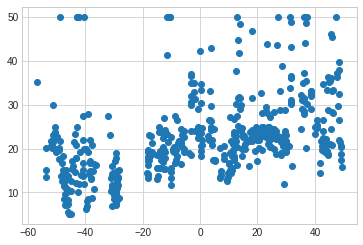

In [31]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

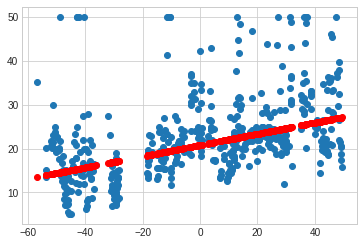

In [33]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [36]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.7s finished


{'fit_time': array([0.09500074, 0.13102174, 0.05342197, 0.08610225, 0.06194019]),
 'score_time': array([0.00728059, 0.00327539, 0.00312614, 0.00311017, 0.01312947]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [41]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01], 'model__epsilon' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [42]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 당뇨병

In [49]:
X, y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [50]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
model = SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [52]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.4701876787244721
평가 데이터 점수 : 0.5953647573877757


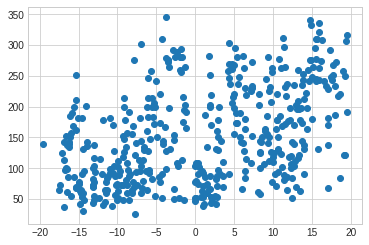

In [53]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

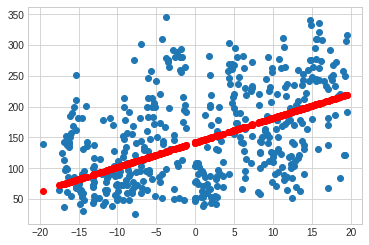

In [54]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [55]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02649617, 0.02237558, 0.01178288, 0.0133357 , 0.00991702]),
 'score_time': array([0.00264239, 0.00276709, 0.00248957, 0.00310159, 0.0014863 ]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [56]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01], 'model__epsilon' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [57]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 보스턴 주택 가격

In [58]:
X, y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
model = SVR(kernel='rbf')
model.fit(X_train,y_train)

SVR()

In [61]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.7042539291866561
평가 데이터 점수 : 0.5078903346536628


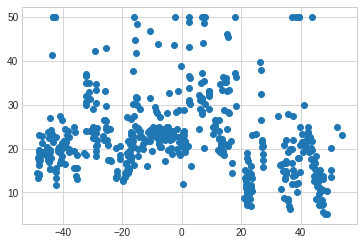

In [62]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

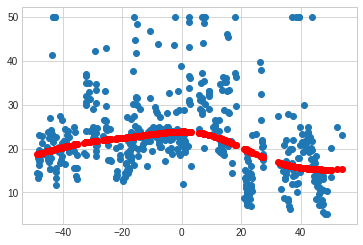

In [63]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [64]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.03149509, 0.04053116, 0.03259206, 0.02314687, 0.01399922]),
 'score_time': array([0.00750542, 0.00605893, 0.00644827, 0.00631666, 0.00360394]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [65]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel' : ['rbf','polynomial','sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [66]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [67]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01], 'model__epsilon' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 243, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'sca

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auoto']}],
             verbose=True)

In [68]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

### 당뇨병

In [72]:
X, y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
model = SVR(kernel='rbf')
model.fit(X_train,y_train)

SVR()

In [75]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.17048825389225242
평가 데이터 점수 : 0.15370217999436353


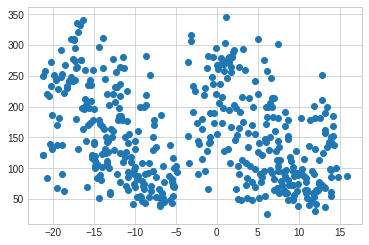

In [76]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

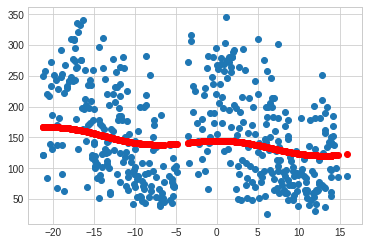

In [77]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [78]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.01682925, 0.01611257, 0.01651621, 0.01607275, 0.00951815]),
 'score_time': array([0.00478148, 0.00464535, 0.0050807 , 0.00465989, 0.00335598]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [79]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel' : ['rbf','polynomial','sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [80]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [81]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01], 'model__epsilon' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [82]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [83]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [84]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.36888922991994977
평가 데이터 점수 : 0.35233295677027


## Linear SVC

### 유방암

In [85]:
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [86]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [88]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.989010989010989
평가 데이터 점수 : 0.9649122807017544


In [95]:
def make_meshgrid(x, y, h=0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [96]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

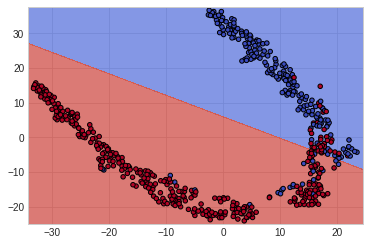

In [97]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.01682925, 0.01611257, 0.01651621, 0.01607275, 0.00951815]),
 'score_time': array([0.00478148, 0.00464535, 0.0050807 , 0.00465989, 0.00335598]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [98]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [102]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [103]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [104]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9868131868131869
평가 데이터 점수 : 0.9736842105263158


### 붓꽃

In [117]:
X, y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [120]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.975
평가 데이터 점수 : 0.9333333333333333


In [121]:
def make_meshgrid(x, y, h=0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [122]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

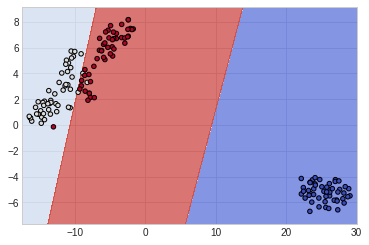

In [123]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [112]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.0030117 , 0.00303531, 0.00231242, 0.00194454, 0.00198102]),
 'score_time': array([0.00088286, 0.00085068, 0.00073075, 0.00069666, 0.00080562]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [113]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [114]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [115]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [116]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 0.9333333333333333


### 와인

In [128]:
X, y = load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [129]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [131]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.9722222222222222


In [132]:
def make_meshgrid(x, y, h=0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [133]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

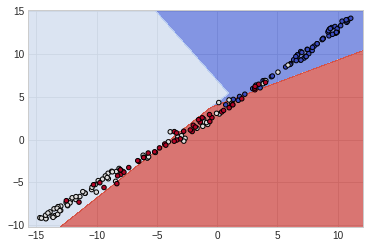

In [134]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [135]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00616813, 0.00528407, 0.00263119, 0.00287366, 0.00191736]),
 'score_time': array([0.00094628, 0.00097489, 0.00082564, 0.00080132, 0.00048923]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [136]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [137]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [138]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [139]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9929577464788732
평가 데이터 점수 : 1.0


## Kernel SVC

### 유방암

In [140]:
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [141]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [143]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.989010989010989
평가 데이터 점수 : 0.9736842105263158


In [144]:
def make_meshgrid(x, y, h=0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [145]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

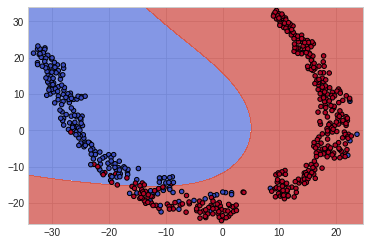

In [146]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [147]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.7s finished


{'fit_time': array([0.01063132, 0.01271105, 0.01050067, 0.00969076, 0.00962901]),
 'score_time': array([0.00288653, 0.00308704, 0.00301218, 0.00280786, 0.00290036]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [148]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [149]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [150]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [151]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.989010989010989
평가 데이터 점수 : 0.9736842105263158


### 붓꽃

In [152]:
X, y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [153]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [155]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9833333333333333
평가 데이터 점수 : 0.9333333333333333


In [156]:
def make_meshgrid(x, y, h=0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [157]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

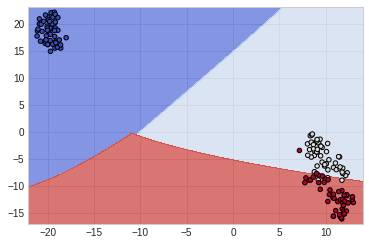

In [158]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [159]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0036242 , 0.00353289, 0.00309372, 0.00690961, 0.00310731]),
 'score_time': array([0.00116467, 0.00199366, 0.00106168, 0.00101376, 0.00104928]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [160]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [161]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [162]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [163]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9833333333333333
평가 데이터 점수 : 0.9333333333333333


### 와인

In [164]:
X, y = load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [165]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [167]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.9722222222222222


In [168]:
def make_meshgrid(x, y, h=0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [169]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

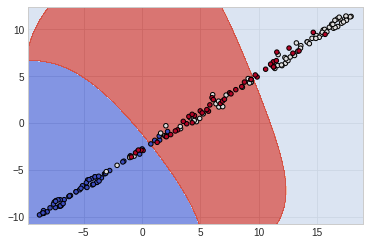

In [170]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [171]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(estimator = estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0090661 , 0.00354505, 0.00347924, 0.00385737, 0.00430894]),
 'score_time': array([0.00232625, 0.00094914, 0.00105333, 0.0013833 , 0.00079632]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [172]:
GridSearchCV,
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale','auto'], 'model__C' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs = multiprocessing.cpu_count(), cv=5, verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [173]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [174]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [175]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.9722222222222222
